# Simple case with DTLZ2 (5 variables, 3 objectives, all to be minimized)

In this experiment, we will consider a discrete sample of 2000 non-dominated solutions for the DTLZ2 problem with 5 variables and 3 objectives to be minimized simultaneously.

In [32]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from desdeo_problem.problem import DiscreteDataProblem
from desdeo_tools.scalarization import SimpleASF, DiscreteScalarizer
from desdeo_tools.solver import DiscreteMinimizer
from shapley_values.explanations import *
from shapley_values.utilities import *


# Load and setup problem
df = pd.read_csv("../data/DTLZ2_5x_3f.csv")
pareto_front = df.to_numpy()

ideal = np.min(pareto_front[:, 0:3], axis=0)
nadir = np.max(pareto_front[:, 0:3], axis=0)

objective_names = ["f1", "f2", "f3"]

problem = DiscreteDataProblem(df, ["x1", "x2", "x3", "x4", "x5"], objective_names, nadir, ideal)

asf = SimpleASF(np.array([1,1,1]))

missing_data = generate_missing_data(200, ideal, nadir)
bb = generate_black_box(problem, asf)
explainer = shap.KernelExplainer(bb, missing_data)

def plot(result, objective_names=objective_names, ymin=0, ymax=1):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylim(ymin, ymax)
    ax.bar(objective_names, np.squeeze(result))
    plt.grid()
    plt.show()

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


## Initial reference point and solution

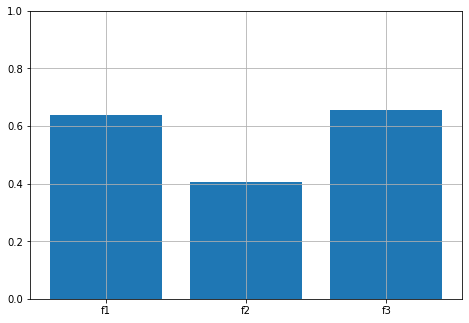

In [33]:
ref_point = np.array([0.65, 0.44, 0.66])
result = bb(np.atleast_2d(ref_point))
shap_values = np.array(explainer.shap_values(ref_point))

plot(result)

## How to improve initial solution

In [34]:
to_improve = 1
suggestion_str = how_to_improve_objective_i(shap_values, to_improve)[0]

# print(suggestion_str)

from IPython.core.display import display, HTML
display(HTML(f"<h3>Suggestion</h3><p style=font-size:20px>{suggestion_str}</p>"))

## After suggestion

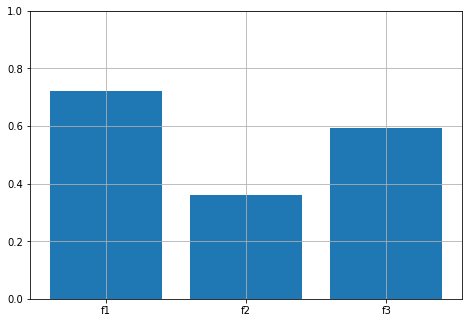

In [35]:
new_ref_point = np.array([0.80, 0.44, 0.66])
new_result = bb(np.atleast_2d(new_ref_point))

plot(new_result)

## Difference

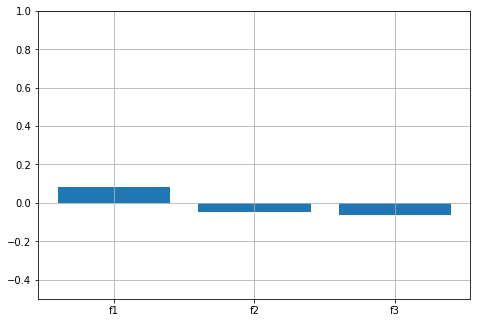

In [36]:
plot(new_result - result, ymin=-0.5)